In [ ]:
import pandas as pd

In [1]:
import pandas as pd

# Caminho do arquivo Excel
arquivo = r"C:\Users\pcp\OneDrive\#jeff\Dev\Analise_Producao\dados\relatorio_modelo_v01.xlsx"

# Ler as abas da planilha
aba_pendente = pd.read_excel(arquivo, sheet_name='relatorio_intranet_pendente')
aba_concluido = pd.read_excel(arquivo, sheet_name='relatorio_intranet_concluido')

destino_concluido = r"C:\Users\pcp\OneDrive\#jeff\Dev\Analise_Producao\dados\relatorio_intranet_concluido.csv"
destino_pendente = r"C:\Users\pcp\OneDrive\#jeff\Dev\Analise_Producao\dados\relatorio_intranet_pendente.csv"

aba_concluido.to_csv(destino_concluido, index=False, encoding='utf-8')
aba_pendente.to_csv(destino_pendente, index=False, encoding='utf-8')


In [2]:
df = pd.read_csv(destino_pendente)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cliente            1145 non-null   object 
 1   Pedido             1145 non-null   object 
 2   Serviço            1145 non-null   object 
 3   Status             1145 non-null   object 
 4   Película?          1145 non-null   object 
 5   Vidro              1145 non-null   object 
 6   Pedido Área        1145 non-null   float64
 7   Pedido Peças       1145 non-null   int64  
 8   Em Produção Área   1145 non-null   float64
 9   Em Produção Peças  1145 non-null   int64  
 10  Corte Padrão?      498 non-null    object 
 11  Entrada            1145 non-null   object 
 12  Financ Lib         32 non-null     object 
 13  Técnico Reg        15 non-null     object 
 14  Técnico Lib        15 non-null     float64
 15   N/C               39 non-null     object 
 16  Previsão           1145 

In [6]:
data_minima = '2025-01-03'
data_maxima = '2025-02-28'

In [8]:

filtro_data = df[(df['Entrega']>= data_minima ) &(df['Entrada'] <= data_maxima)]
total_unidade = filtro_data['Pedido Peças'].sum()
total_unidade

np.int64(724)

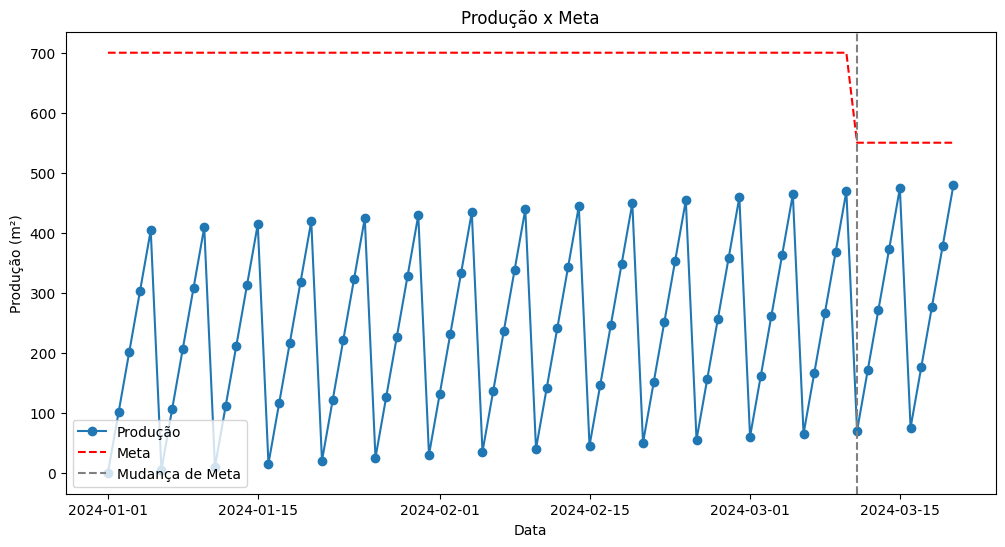

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar dados fictícios de produção diária
datas = pd.date_range(start="2024-01-01", end="2024-03-20")  # De 01/01 a 20/03
producao = [i + (i % 5) * 100 for i in range(len(datas))]  # Produção fictícia

# Criar DataFrame
df = pd.DataFrame({"Data": datas, "Producao": producao})

# Definir a meta variável
df["Meta"] = df["Data"].apply(lambda x: 700 if x < pd.Timestamp("2024-03-11") else 550)

# Criar gráfico
plt.figure(figsize=(12, 6))
plt.plot(df["Data"], df["Producao"], label="Produção", marker="o")
plt.plot(df["Data"], df["Meta"], label="Meta", linestyle="dashed", color="red")

# Formatação
plt.axvline(pd.Timestamp("2024-03-11"), color="gray", linestyle="--", label="Mudança de Meta")  # Linha vertical indicando a mudança
plt.xlabel("Data")
plt.ylabel("Produção (m²)")
plt.title("Produção x Meta")
plt.legend()
# Mostrar gráfico
plt.show()
